In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
models_name = [
    "basic-mini",
    "basic-base",
    "basic-large",
    "february_finetuned",
    "march_finetuned",
    "art-mini",
    "art-base",
    "art-large",
]
data = {}
for model_name in models_name:
    data[model_name] = {}
    data[model_name]["metrics"] = pd.read_csv(f"../benchmarks/proper_nouns/proper_nouns__{model_name}.csv")


In [5]:
def getdf(model_name):
    df = data[model_name]["metrics"] 
    df["model"] = model_name
    return df 

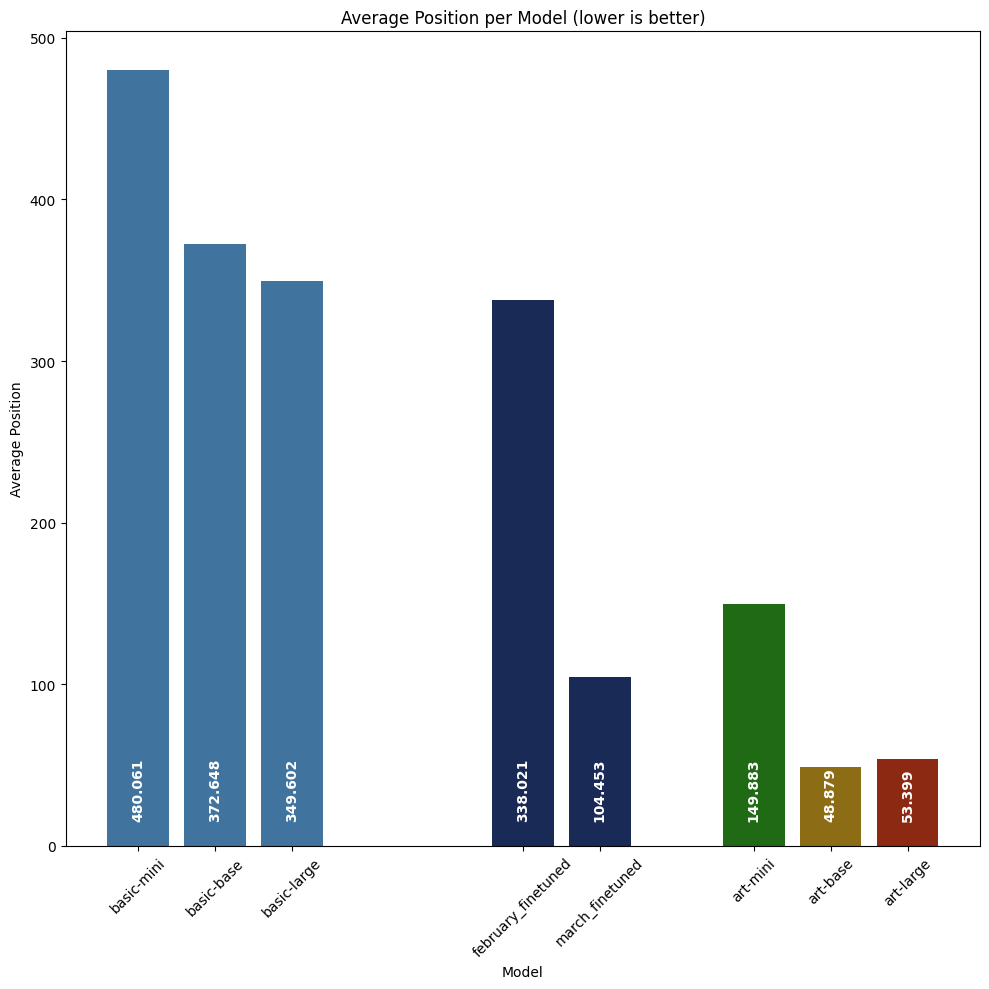

In [24]:
all_df = pd.concat([getdf(model_name) for model_name in models_name])
# Reorder columns
all_df = all_df[["model", "average_position"]]

# Plot average_position per model
plt.figure(figsize=(10, 10))
plt.title("Average Position per Model (lower is better)")
plt.xlabel("Model")
plt.ylabel("Average Position")
plt.xticks(rotation=45)
plt.grid(axis='y')

x_pos = [0,1,2, 5,6, 8,9,10]

best_value_index = np.argmin(all_df["average_position"])
# Highlight the best value in the bar chart
edge_colors = ["#ffffff"] * len(x_pos)
edge_colors[best_value_index] = "#000"

plt.bar(x_pos, all_df["average_position"], color=["#40739e", "#40739e", "#40739e", "#192a56", "#192a56", "#206915", "#8c6d15", "#8c2912"])
# Add the value in the center (middle vertical) of the bar
for j, value in enumerate(all_df["average_position"]):
    plt.text(x_pos[j], 15, str(round(value, 3)), ha='center', va='bottom', fontsize=10, color='white', rotation=90, fontweight='bold')
# Add a "BEST" label on the best bar

plt.xticks(x_pos, all_df["model"], rotation=45)
plt.tight_layout()
plt.grid(False)
plt.savefig("../figures/benchmarks_figures/average_position_per_model.png")
plt.show()